<a href="https://colab.research.google.com/github/43pratik/ML_lab/blob/main/Prac_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
data = pd.read_csv('/content/Housing_Price_Data.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [5]:
categorical_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
numerical_cols = ["area", "bedrooms", "bathrooms", "stories", "parking"]
data1 = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data1.replace(True, 1, inplace=True)
data1.replace(False, 0, inplace=True)
data1.head()

<ipython-input-5-8731653b8895>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1.replace(False, 0, inplace=True)


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [6]:
def remove_outliers(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)  # 25th percentile
        Q3 = data[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

df_cleaned = remove_outliers(data1, numerical_cols)

# Print before and after size
print(f"Original Dataset Size: {data1.shape}")
print(f"Cleaned Dataset Size: {df_cleaned.shape}")
data1 = df_cleaned

Original Dataset Size: (545, 14)
Cleaned Dataset Size: (472, 14)


In [7]:
X = data1.drop(columns=["price"])
y = data1["price"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([5753076.09620809, 4673705.07968671, 7598730.86308615,
       4234809.58438626, 4296317.16994637, 3821360.10422844,
       4140950.56392864, 5170458.85163992, 5783417.89121057,
       4944346.62096501, 6215437.73943326, 4599523.93748264,
       3140628.28727426, 5387108.61450182, 4347860.39133583,
       3201605.63560188, 4088264.25425639, 5554606.91878701,
       4888915.84662826, 6534945.06926952, 7851159.28095207,
       3490532.08966375, 6254602.59038918, 3569596.5742946 ,
       5713401.09401406, 2817262.81070505, 3718676.64693326,
       6444108.97073953, 5581111.99732243, 2715887.81606558,
       5596594.36998496, 4137639.80588753, 5048204.16302799,
       2926563.46178634, 7903891.60047291, 5605385.45273803,
       3634201.55360217, 2454938.35726927, 6270422.26556661,
       2889041.93824254, 3346796.63617999, 3113035.0439993 ,
       2392354.65082147, 3329077.57140494, 3247178.19366828,
       3251786.8093433 , 3356858.00597628, 5853174.12264235,
       6468818.93097249,

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 780357.73
Root Mean Squared Error: 1159622.56
R² Score: 0.63


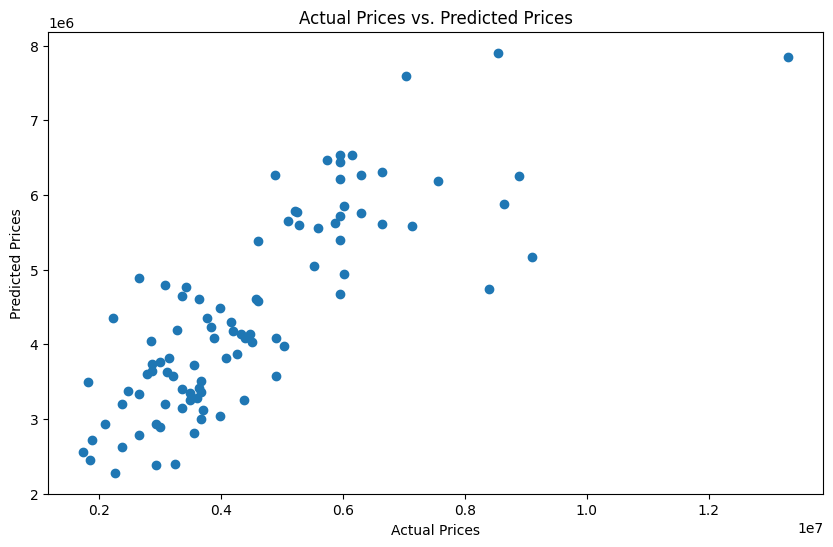

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
# Load the dataset
data = pd.read_csv('Housing_Price_Data.csv')

# Define numerical and categorical features
numerical_cols = ["area", "bedrooms", "bathrooms", "stories", "parking"]
categorical_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]

In [16]:
# One-hot encode categorical features
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [17]:
# Define features and target variable
X = data[numerical_cols + list(data.columns[len(numerical_cols):])]
y = data["price"]
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [19]:
# Train and evaluate KNN Regression for different k values
k_values = [3, 5, 7]
mae_scores, mse_scores, rmse_scores = [], [], []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)

    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred_knn)
    mse = mean_squared_error(y_test, y_pred_knn)
    rmse = np.sqrt(mse)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

    print(f"K={k}: MAE={mae}, MSE={mse}, RMSE={rmse}")

K=3: MAE=1358995.4128440367, MSE=3533623374362.8945, RMSE=1879793.439280735
K=5: MAE=1297247.7064220184, MSE=3217216430091.743, RMSE=1793660.0653668307
K=7: MAE=1344127.7064220184, MSE=3409938298040.367, RMSE=1846601.824444124


In [20]:
# Compare Linear Regression performance
print("\nLinear Regression Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")


Linear Regression Metrics:
MAE: 970043.4039201636
MSE: 1754318687330.6597
RMSE: 1324506.960091437


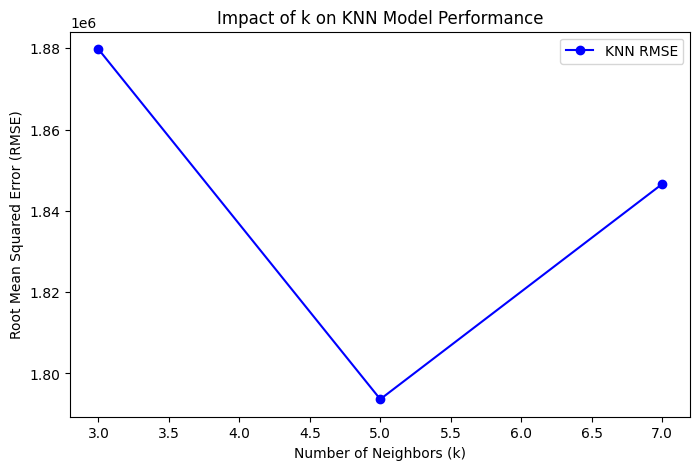

In [21]:
# Plot K values vs. RMSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, rmse_scores, marker='o', linestyle='-', color='b', label='KNN RMSE')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Impact of k on KNN Model Performance")
plt.legend()
plt.show()